In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
y = train_data["Survived"]

features = ["Pclass","Sex","SibSp","Parch"]
p = train_data[features]
X = pd.get_dummies(train_data[features])

In [9]:
X_test = pd.get_dummies(test_data[features])

In [10]:
# model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
# model.fit(X,y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerID': test_data.PassengerId, 'Survived': predictions})

In [11]:
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [12]:
Pclass1 = train_data.loc[train_data.Pclass == 1]["Survived"]
print("% of Pclass=1 survivors:",sum(Pclass1)/len(Pclass1))
Pclass2 = train_data.loc[train_data.Pclass == 2]["Survived"]
print("% of Pclass=2 survivors:",sum(Pclass2)/len(Pclass2))
Pclass3 = train_data.loc[train_data.Pclass == 3]["Survived"]
print("% of Pclass=3 survivors:",sum(Pclass3)/len(Pclass3))

#P1 class has the highest survival ratio

% of Pclass=1 survivors: 0.6296296296296297
% of Pclass=2 survivors: 0.47282608695652173
% of Pclass=3 survivors: 0.24236252545824846


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [14]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


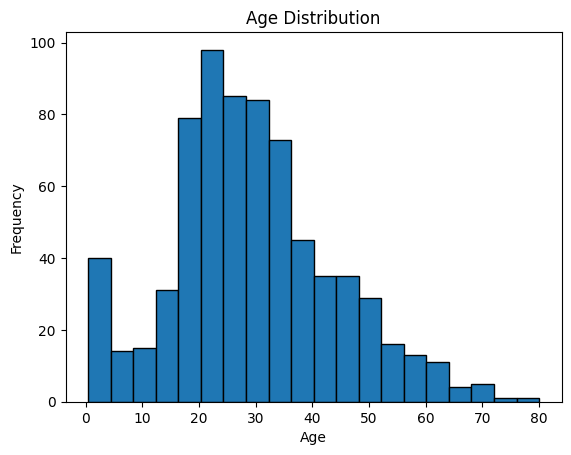

In [17]:
import matplotlib.pyplot as plt
age_data = train_data['Age'].dropna()  


plt.hist(age_data, bins=20, edgecolor='k')  

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

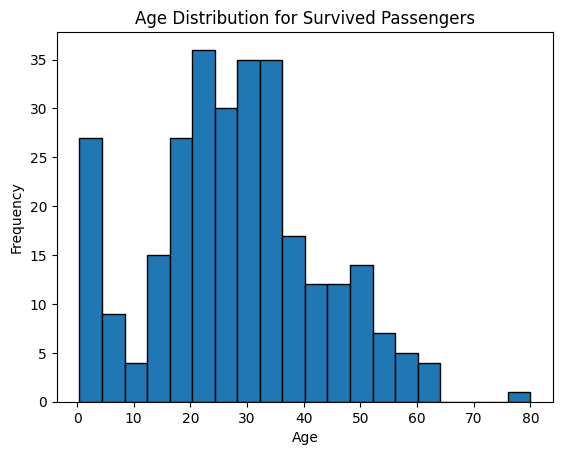

In [18]:

survived_data = train_data[train_data['Survived'] == 1]['Age'].dropna()


plt.hist(survived_data, bins=20, edgecolor='k')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Survived Passengers')

plt.show()

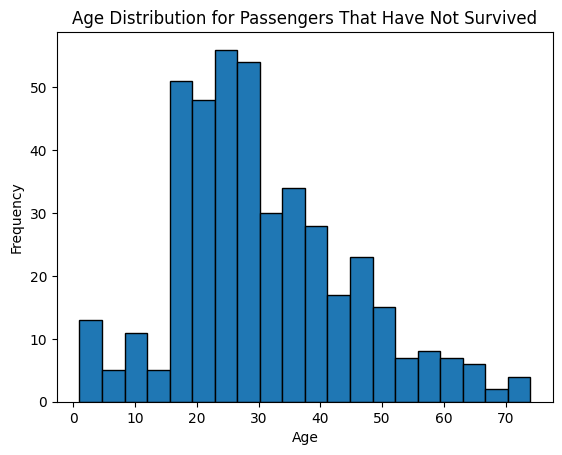

In [19]:
not_survived_data = train_data[train_data['Survived'] == 0]['Age'].dropna()


plt.hist(not_survived_data, bins=20, edgecolor='k')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Passengers That Have Not Survived')

plt.show()

In [20]:
mapping_pclass = {1:1, 2:2, 3:3}
train_data['Pclass'] = train_data['Pclass'].map(mapping_pclass)
test_data['Pclass'] = test_data['Pclass'].map(mapping_pclass)


In [21]:
def get_title(var):
    title = var.split(',')[1]
    title2 = title.split('.')[0]
    return title2[1:]

In [22]:
train_data.head()
train_data['Title'] = train_data.apply(lambda x: get_title(x.Name), axis = 1)
test_data['Title'] = test_data.apply(lambda x: get_title(x.Name), axis = 1)

In [23]:
print(train_data.groupby('Title').count().sort_values(by='Survived', ascending=False)['Pclass'])

print("\n------------\n")
print(test_data.groupby('Title').count().sort_values(by='Name', ascending=False)['Pclass'])

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Pclass, dtype: int64

------------

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Pclass, dtype: int64


In [24]:
train_data['Title'] = train_data['Name'].apply(get_title)
test_data['Title'] = test_data['Name'].apply(get_title)

title_map = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3,
    "Major": 3, "Mlle": 3, "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3,
    "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3
}

train_data['Title'] = train_data['Title'].map(title_map)
test_data['Title'] = test_data['Title'].map(title_map)

train_data.drop('Name', axis=1, inplace = True)
test_data.drop('Name', axis=1, inplace = True)

In [25]:
null_title_rows = train_data[train_data['Title'].isnull()]
null_title_rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
759,760,1,1,female,33.0,0,0,110152,86.5,B77,S,NaN


In [26]:
train_data['Title'].fillna(3.0, inplace=True)

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [28]:
train_data=train_data.drop("PassengerId",axis=1)

In [29]:
#train_data_age_mean = round(train_data_age.dropna().groupby(cat, as_index=True).median(),1)
cat = ['Sex', 'Pclass', 'Title']



#this dataframe contains the age and the categorical values 
train_data_age = pd.concat([train_data[cat + ['Age']], test_data[cat + ['Age']]], axis=0)
train_data_age_mean = round(train_data_age.dropna().groupby(cat, as_index=True).median(),1)

def get_age(var, sex, pclass, title):
    """
    This function takes as input the categorical variables 
    and it returns the average age given the categorical variables 
    
    """
    if np.isnan(var):
        mean = train_data_age_mean['Age'][sex][pclass][title]
    else:
        mean = var
    return mean

In [30]:
train_data_age.isnull().sum()

Sex         0
Pclass      0
Title       0
Age       263
dtype: int64

In [31]:
# train_data['Age'] = train_data.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)
# test_data['Age'] = test_data.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [32]:
def categorize_age(age):
    if age <= 16:
        return 0
    elif 16 < age <= 26:
        return 1
    elif 26 < age <= 36:
        return 2
    elif 36 < age <= 62:
        return 3
    elif age > 62:
        return 4

train_data['Age'] = train_data['Age'].apply(categorize_age)
test_data['Age'] = test_data['Age'].apply(categorize_age)

In [33]:
def get_family_size(Parch, SibSp):
   
    return Parch + SibSp + 1

In [34]:
train_data['FamilySize'] = train_data.apply(lambda x: get_family_size(x.Parch, x.SibSp), axis = 1)
test_data['FamilySize'] = test_data.apply(lambda x: get_family_size(x.Parch, x.SibSp), axis=1)

In [35]:
train_data[["FamilySize", "Survived"]].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [36]:
def get_family_type(var):
    
    if var == 1:
        return 'Alone'
    elif var<=4:
        return 'Small'
    else:
        return 'Big'

In [37]:
train_data['FamilyType'] = train_data.apply(lambda x: get_family_type(x.FamilySize), axis = 1)
test_data['FamilyType'] = test_data.apply(lambda x: get_family_type(x.FamilySize), axis=1)

In [38]:
train_data[["FamilyType", "Survived"]].groupby(['FamilyType']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilyType,
Small,0.578767
Alone,0.303538
Big,0.161290


In [39]:
train_data.drop(['FamilySize', 'Parch', 'SibSp'], axis = 1, inplace=True)
test_data.drop(['FamilySize', 'Parch', 'SibSp'], axis = 1, inplace=True)

In [40]:
def get_prefix(var):
    if var.isdigit():
        return 'missing_value'
    else:

        var_ = var.replace('.','').replace('/', '').split(' ')[0]
        return var_

In [41]:
list_prefix = list()
for i in range(len(train_data)):
    list_prefix.append(get_prefix(train_data.Ticket.iloc[i]))
train_data['prefix'] = list_prefix

In [42]:
train_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyType,prefix
0,0,3,male,1,A/5 21171,7.2500,NaN,S,0.0,Small,A5
1,1,1,female,3,PC 17599,71.2833,C85,C,2.0,Small,PC
2,1,3,female,1,STON/O2. 3101282,7.9250,NaN,S,1.0,Alone,STONO2
3,1,1,female,2,113803,53.1000,C123,S,2.0,Small,missing_value
4,0,3,male,2,373450,8.0500,NaN,S,0.0,Alone,missing_value


In [43]:
train_data.groupby('prefix').count()['Survived']

prefix
A4                 7
A5                21
AS                 1
C                  5
CA                41
CASOTON            1
FC                 1
FCC                5
Fa                 1
LINE               4
PC                60
PP                 3
PPP                2
SC                 1
SCA4               1
SCAH               3
SCOW               1
SCPARIS            7
SCParis            4
SOC                6
SOP                1
SOPP               3
SOTONO2            2
SOTONOQ           15
SP                 1
STONO             12
STONO2             6
SWPP               2
WC                10
WEP                3
missing_value    661
Name: Survived, dtype: int64

In [44]:
drop = ["SP", "SOP", "Fa", "SCOW", "PPP", "AS", "CASOTON", "SWPP", "SCA4","SC"]
train_data = train_data.replace(drop,'N/A')

In [45]:
sex_mapping = {"male": 0, "female": 1}

train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

In [46]:
common_value = 'S'
train_data["Embarked"] = train_data["Embarked"].fillna(common_value)
test_data = test_data.fillna(test_data['Fare'].mean())

In [47]:
# embarked_mapping = {"S": 0, "C": 1, "Q": 2}

# train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
# test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

In [48]:
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [49]:
def categorize_fare(fare):
    if fare <= 17:
        return 0
    elif 17 < fare <= 30:
        return 1
    elif 30 < fare <= 100:
        return 2
    else:
        return 3

train_data['Fare'] = train_data['Fare'].apply(categorize_fare)
test_data['Fare'] = test_data['Fare'].apply(categorize_fare)

In [50]:
list_prefix = list()
for i in range(len(test_data)):
    list_prefix.append(get_prefix(test_data.Ticket.iloc[i]))
test_data['prefix'] = list_prefix

In [51]:
train_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyType,prefix
0,0,3,0,1,A/5 21171,0,NaN,S,0.0,Small,A5
1,1,1,1,3,PC 17599,2,C85,C,2.0,Small,PC
2,1,3,1,1,STON/O2. 3101282,0,NaN,S,1.0,Alone,STONO2
3,1,1,1,2,113803,2,C123,S,2.0,Small,missing_value
4,0,3,0,2,373450,0,NaN,S,0.0,Alone,missing_value


In [52]:
train_data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [53]:
train_data['Cabin'] = train_data['Cabin'].str[:1]
test_data['Cabin'] = test_data['Cabin'].str[:1]

In [54]:
train_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyType,prefix
0,0,3,0,1,A/5 21171,0,NaN,S,0.0,Small,A5
1,1,1,1,3,PC 17599,2,C,C,2.0,Small,PC
2,1,3,1,1,STON/O2. 3101282,0,NaN,S,1.0,Alone,STONO2
3,1,1,1,2,113803,2,C,S,2.0,Small,missing_value
4,0,3,0,2,373450,0,NaN,S,0.0,Alone,missing_value


In [55]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train_data['Cabin'] = train_data['Cabin'].map(cabin_mapping)
test_data['Cabin'] = test_data['Cabin'].map(cabin_mapping)

In [56]:
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [57]:
train_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyType,prefix
0,0,3,0,1,A/5 21171,0,2.0,S,0.0,Small,A5
1,1,1,1,3,PC 17599,2,0.8,C,2.0,Small,PC
2,1,3,1,1,STON/O2. 3101282,0,2.0,S,1.0,Alone,STONO2
3,1,1,1,2,113803,2,0.8,S,2.0,Small,missing_value
4,0,3,0,2,373450,0,2.0,S,0.0,Alone,missing_value


In [58]:
# common_value = 'S'
# train_data["Embarked"] = train_data["Embarked"].fillna(common_value)
# test_data = test_data.fillna(test_data['Fare'].mean())

In [59]:
le = LabelEncoder()
# train_data['Sex'] = le.fit_transform(train_data['Sex'])
# test_data["Sex"]= le.fit_transform(test_data["Sex"])

In [60]:
train_data["Embarked"]= le.fit_transform(train_data["Embarked"])
test_data["Embarked"]= le.fit_transform(test_data["Embarked"])

In [61]:
train_data["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [62]:
train_data["FamilyType"]= le.fit_transform(train_data["FamilyType"])
test_data["FamilyType"]= le.fit_transform(test_data["FamilyType"])

In [63]:
train_data["Title"]= le.fit_transform(train_data["Title"])
test_data["Title"]= le.fit_transform(test_data["Title"])

In [64]:
train_data = train_data.drop(["Ticket"],axis = 1)
#train_data = train_data.drop(["Fare"],axis = 1)
#train_data = train_data.drop(["Cabin"],axis = 1)
train_data = train_data.drop(["prefix"],axis = 1)

In [65]:
test_data = test_data.drop(["prefix","Ticket"],axis = 1)

In [66]:
X1_train = train_data.drop("Survived", axis=1)
Y1_train = train_data["Survived"]
X1_test  = test_data.drop("PassengerId", axis=1).copy()

In [67]:
X1_train.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilyType
0,3,0,1,0,2.0,2,0,2
1,1,1,3,2,0.8,0,2,2
2,3,1,1,0,2.0,2,1,0
3,1,1,2,2,0.8,2,2,2
4,3,0,2,0,2.0,2,0,0
5,3,0,2,0,2.0,1,0,0
6,1,0,3,2,1.6,2,0,0
7,3,0,0,1,2.0,2,3,1
8,3,1,2,0,2.0,2,2,2
9,2,1,0,2,1.8,0,2,2


In [68]:
X1_test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilyType
0,3,0,2,0,2.0,1,0,0
1,3,1,3,0,2.0,2,2,2
2,2,0,3,0,2.0,1,0,0
3,3,0,2,0,2.0,2,0,0
4,3,1,1,0,2.0,2,2,2
...,...,...,...,...,...,...,...,...
413,3,0,2,0,2.0,2,0,0
414,1,1,3,3,0.8,0,3,0
415,3,0,3,0,2.0,2,0,0
416,3,0,2,0,2.0,2,0,0


In [69]:
# sc = StandardScaler()z
#X1_train = sc.fit_transform(X1_train)
#X1_test = sc.transform(X1_test)

In [70]:
svm = SVC()
svm.fit(X1_train, Y1_train)
Y1_pred = svm.predict(X1_test)

In [71]:
accuracy = svm.score(X1_train, Y1_train)*100

In [72]:
accuracy

84.39955106621774

In [73]:
output = pd.DataFrame({'PassengerID': test_data.PassengerId, 'Survived': Y1_pred})

In [74]:
output.to_csv('submission.csv', index=False)

In [75]:
ls

submission.csv


In [76]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [77]:
scoring = 'accuracy'
score = cross_val_score(svm, X1_train,Y1_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.84269663 0.83146067 0.84269663 0.82022472
 0.83146067 0.85393258 0.82022472 0.86516854]


In [78]:
round(np.mean(score)*100,2)

83.5